<a href="https://colab.research.google.com/github/addkishore/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/5_CNN_SkinCancer4_0(imp_for_referrals(csv_to_jpg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kishorrekumar","key":"077d0a8fd2c08d1c0336bdcbd5f9ab28"}'}

In [ ]:
import os

In [ ]:

os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [00:27<00:00, 207MB/s]
100% 5.20G/5.20G [00:27<00:00, 202MB/s]


In [ ]:
!unzip /content/skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, BatchNormalization
from scipy import stats

In [ ]:
df=pd.read_csv('/content/HAM10000_metadata.csv')

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
le=LabelEncoder()

In [ ]:
le.fit(df['dx'])

LabelEncoder()

In [ ]:
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:

df['label']=le.transform(df['dx'])

Plotting Figures


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


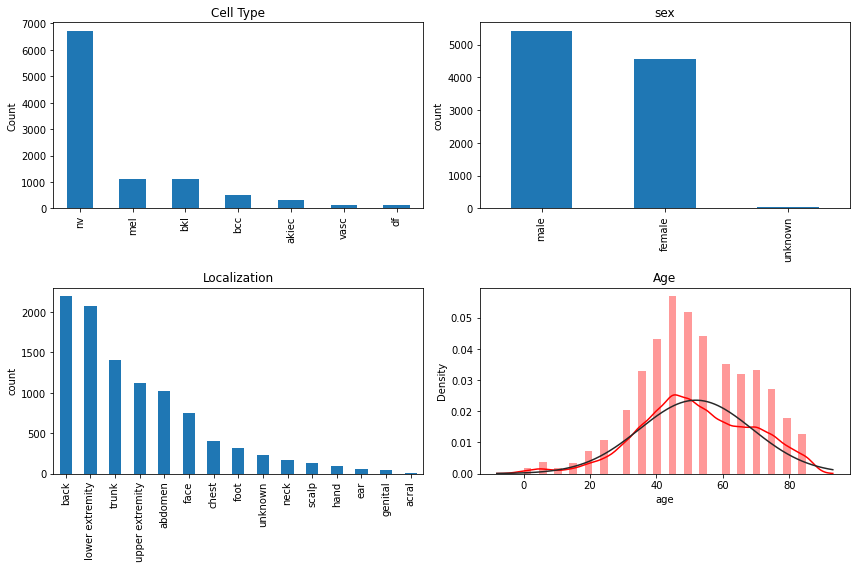

In [ ]:
fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(221)
df['dx'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2=fig.add_subplot(222)
df['sex'].value_counts().plot(kind='bar',ax=ax2)
ax2.set_ylabel('count')
ax2.set_title('sex')

ax3=fig.add_subplot(223)
df['localization'].value_counts().plot(kind='bar',ax=ax3)
ax3.set_ylabel('count')
ax3.set_title('Localization')


ax4=fig.add_subplot(224)
sample_age=df[pd.notnull(df['age'])]
sns.distplot(sample_age['age'] , fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()



In [ ]:
df['label'].value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
df0=df[df['label']==0]
df1=df[df['label']==1]
df2=df[df['label']==2]
df3=df[df['label']==3]
df4=df[df['label']==4]
df5=df[df['label']==5]
df6=df[df['label']==6]

In [ ]:
df1.count()


lesion_id       514
image_id        514
dx              514
dx_type         514
age             514
sex             514
localization    514
label           514
dtype: int64

In [ ]:
n_sample=500

In [ ]:
dfb0=resample(df0,n_samples=n_sample,replace=True,random_state=42)
dfb1=resample(df1,n_samples=n_sample,replace=True,random_state=42)
dfb2=resample(df2,n_samples=n_sample,replace=True,random_state=42)
dfb3=resample(df3,n_samples=n_sample,replace=True,random_state=42)
dfb4=resample(df4,n_samples=n_sample,replace=True,random_state=42)
dfb5=resample(df5,n_samples=n_sample,replace=True,random_state=42)
dfb6=resample(df6,n_samples=n_sample,replace=True,random_state=42)

In [ ]:
dfb3.count()

lesion_id       500
image_id        500
dx              500
dx_type         500
age             500
sex             500
localization    500
label           500
dtype: int64

In [ ]:
dfb3.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
label           0
dtype: int64

In [ ]:
dfb0.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0


In [ ]:
dfb=pd.concat([dfb0,dfb1,dfb2,dfb3,dfb4,dfb5,dfb6])

In [ ]:
dfb['label'].value_counts()

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64

In [ ]:
dfb.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0


In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 9789 to 2363
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     3500 non-null   object 
 1   image_id      3500 non-null   object 
 2   dx            3500 non-null   object 
 3   dx_type       3500 non-null   object 
 4   age           3488 non-null   float64
 5   sex           3500 non-null   object 
 6   localization  3500 non-null   object 
 7   label         3500 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 246.1+ KB


**Read Images based on image_id**

In [ ]:
SIZE=(32,32)

In [ ]:
image_path= {os.path.splitext(os.path.basename(x))[0]: x
             for x in glob(os.path.join('/content','*','*.jpg'))}

In [ ]:
dfb['path']=dfb['image_id'].map(image_path.get)

In [ ]:
dfb['image']=dfb['path'].map(lambda x : np.asarray(Image.open(x).resize((32,32))))

PLotting the images

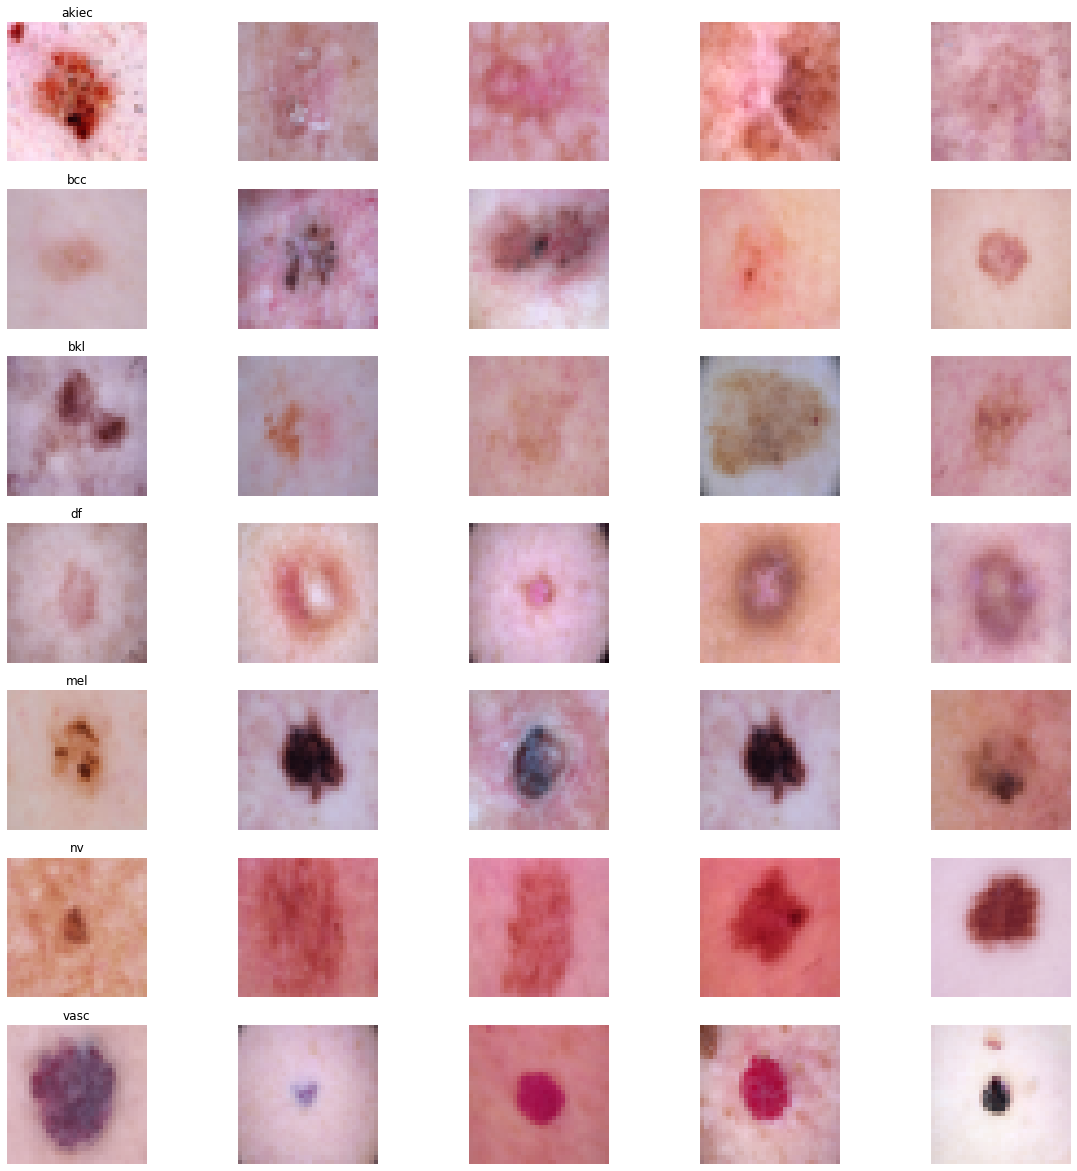

In [ ]:
n_samples=5

fig,m_ax = plt.subplots(7,n_samples,figsize=(20,21))
for n_ax ,(type_name,type_rows) in zip(m_ax,dfb.sort_values(['dx']).groupby('dx')):
  n_ax[0].set_title(type_name)
  for c_ax,(_,c_row) in zip(n_ax,type_rows.sample(n_sample,random_state=1234).iterrows()):
    c_ax.imshow(c_row['image'])
    c_ax.axis('off')


Assigning X and Y

In [ ]:
X= np.asarray(dfb['image'].tolist())
X=X/255

In [ ]:
Y=dfb['label']
Y_cat=to_categorical(Y,num_classes=7)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y_cat,test_size=0.2,random_state=42)

Building a model

In [ ]:
num_of_classes=7

model = Sequential()

model.add(Conv2D(256,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [ ]:
batch_size=16
epochs=50

history=model.fit(
    X_train,y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test,y_test),
    verbose=2)

Epoch 1/50
175/175 - 3s - loss: 0.3598 - acc: 0.8696 - val_loss: 0.7528 - val_acc: 0.7986 - 3s/epoch - 16ms/step
Epoch 2/50
175/175 - 2s - loss: 0.3693 - acc: 0.8696 - val_loss: 0.7991 - val_acc: 0.7829 - 2s/epoch - 13ms/step
Epoch 3/50
175/175 - 2s - loss: 0.3739 - acc: 0.8607 - val_loss: 0.7050 - val_acc: 0.7914 - 2s/epoch - 12ms/step
Epoch 4/50
175/175 - 2s - loss: 0.3788 - acc: 0.8568 - val_loss: 0.7181 - val_acc: 0.7971 - 2s/epoch - 11ms/step
Epoch 5/50
175/175 - 2s - loss: 0.3492 - acc: 0.8775 - val_loss: 0.7001 - val_acc: 0.8014 - 2s/epoch - 11ms/step
Epoch 6/50
175/175 - 2s - loss: 0.3677 - acc: 0.8682 - val_loss: 0.6986 - val_acc: 0.7929 - 2s/epoch - 12ms/step
Epoch 7/50
175/175 - 2s - loss: 0.4084 - acc: 0.8511 - val_loss: 0.6925 - val_acc: 0.7929 - 2s/epoch - 12ms/step
Epoch 8/50
175/175 - 2s - loss: 0.3596 - acc: 0.8764 - val_loss: 0.7007 - val_acc: 0.7986 - 2s/epoch - 12ms/step
Epoch 9/50
175/175 - 2s - loss: 0.3505 - acc: 0.8746 - val_loss: 0.7126 - val_acc: 0.7986 - 2s/e

In [ ]:
score=model.evaluate(X_test,y_test)



22/22 [==============================] - 0s 12ms/step - loss: 0.7488 - acc: 0.7857


In [ ]:
print('Test Accuracy:',score)

Test Accuracy: [0.7488394379615784, 0.7857142686843872]


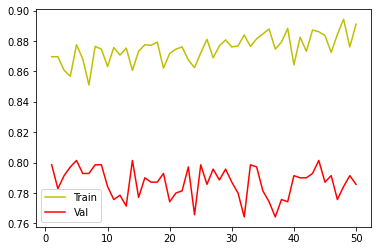

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'y',label='Train')
plt.plot(epochs,val_acc,'r',label='Val')
plt.legend()
plt.show()



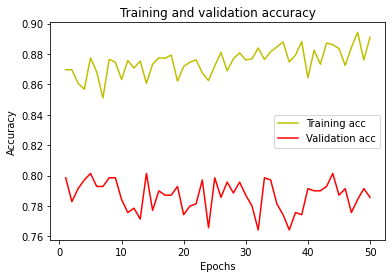

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

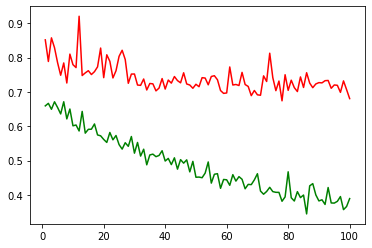

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,'g',label='Loss Train')
plt.plot(epochs,val_loss,'r',label='Val Loss')

In [ ]:
y_pred=model.predict(X_test)

y_pred_classes = np.argmax(y_pred,axis=1)

y_true = np.argmax(y_test,axis=1)

In [ ]:
cm=confusion_matrix(y_pred_classes,y_true)

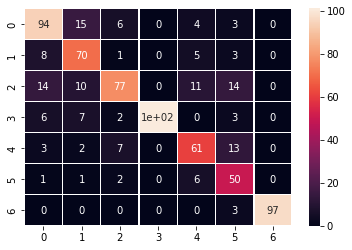

In [ ]:
sns.heatmap(cm, annot=True, linewidths=.5)

<BarContainer object of 7 artists>

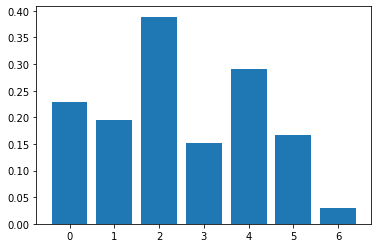

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)

In [ ]:
y_true[:10]

array([3, 4, 4, 3, 0, 4, 3, 3, 2, 0])

In [ ]:
y_pred_classes[:10]

array([3, 1, 2, 3, 0, 4, 3, 3, 2, 0])